---

_You are currently looking at **version 0.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the Jupyter Notebook FAQ course resource._

---

# Assignment 1 - Introduction to Machine Learning

For this assignment, you will be using the Breast Cancer Wisconsin (Diagnostic) Database to create a classifier that can help diagnose patients. First, read through the description of the dataset (below).

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

print(cancer.DESCR) # Print the data set description

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

The object returned by `load_breast_cancer()` is a scikit-learn Bunch object, which is similar to a dictionary.

In [2]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

### Question 0 (Example)

How many features does the breast cancer dataset have?

*This function should return an integer.*

In [3]:
def answer_zero():
    features = cancer['feature_names']
    return len(features)
   
print(answer_zero())

30


### Question 1

Scikit-learn works with lists, numpy arrays, scipy-sparse matrices, and pandas DataFrames, so converting the dataset to a DataFrame is not necessary for training this model. Using a DataFrame does however help make many things easier such as munging data, so let's practice creating a classifier with a pandas DataFrame. 



Convert the sklearn.dataset `cancer` to a DataFrame. 

*This function should return a `(569, 31)` DataFrame with * 

*columns = *

    ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
    'mean smoothness', 'mean compactness', 'mean concavity',
    'mean concave points', 'mean symmetry', 'mean fractal dimension',
    'radius error', 'texture error', 'perimeter error', 'area error',
    'smoothness error', 'compactness error', 'concavity error',
    'concave points error', 'symmetry error', 'fractal dimension error',
    'worst radius', 'worst texture', 'worst perimeter', 'worst area',
    'worst smoothness', 'worst compactness', 'worst concavity',
    'worst concave points', 'worst symmetry', 'worst fractal dimension',
    'target']

*and index = *

    RangeIndex(start=0, stop=569, step=1)

In [4]:
import pandas as pd

def answer_one():
    # Load the dataset into a DataFrame
    df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
    # Add the target column to the DataFrame
    df['target'] = cancer.target
    return df

### Question 2
What is the class distribution? (i.e. how many instances of `malignant` and how many `benign`?)

*This function should return a Series named `target` of length 2 with integer values and index =* `['malignant', 'benign']`

In [5]:
def answer_two():
    # Calculate class distribution using value_counts()
    counts = pd.Series(cancer.target).value_counts()
    counts.index = ['benign', 'malignant']
    return counts

### Question 3
Split the DataFrame into `X` (the data) and `y` (the labels).

*This function should return a tuple of length 2:* `(X, y)`*, where* 
* `X` *has shape* `(569, 30)`
* `y` *has shape* `(569,)`.

In [6]:
def answer_three():
    df = answer_one()  # Retrieve DataFrame from answer_one function
    X = df.iloc[:, :-1]  # Features (all columns except the last one)
    y = df['target']     # Target variable (last column)
    return X, y

### Question 4
Using `train_test_split`, split `X` and `y` into training and test sets `(X_train, X_test, y_train, and y_test)`.

**Set the random number generator state to 0 using `random_state=0` to make sure your results match the autograder!**

*This function should return a tuple of length 4:* `(X_train, X_test, y_train, y_test)`*, where* 
* `X_train` *has shape* `(426, 30)`
* `X_test` *has shape* `(143, 30)`
* `y_train` *has shape* `(426,)`
* `y_test` *has shape* `(143,)`

In [7]:
from sklearn.model_selection import train_test_split

def answer_four():
    X, y = answer_three()  # Retrieve X and y from answer_three function
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    return X_train, X_test, y_train, y_test

### Question 5
Using KNeighborsClassifier, fit a k-nearest neighbors (knn) classifier with `X_train`, `y_train` and using one nearest neighbor (`n_neighbors = 1`).

*This function should return a `sklearn.neighbors.classification.KNeighborsClassifier`.

In [8]:
from sklearn.neighbors import KNeighborsClassifier

def answer_five():
    X_train, X_test, y_train, y_test = answer_four()  # Retrieve train-test split from answer_four function
    knn = KNeighborsClassifier(n_neighbors=1)  # Initialize KNeighborsClassifier with 1 neighbor
    knn.fit(X_train, y_train)  # Fit classifier to training data
    return knn

print(answer_five())

KNeighborsClassifier(n_neighbors=1)


### Question 6
Using your knn classifier, predict the class label using the mean value for each feature.

Hint: You can use `cancerdf.mean()[:-1].values.reshape(1, -1)` which gets the mean value for each feature, ignores the target column, and reshapes the data from 1 dimension to 2 (necessary for the precict method of KNeighborsClassifier).

In [9]:
def answer_six():
    knn = answer_five()  # Retrieve knn classifier from answer_five function
    df = answer_one()    # Retrieve DataFrame from answer_one function
    means = df.mean()[:-1].values.reshape(1, -1)  # Calculate mean values for each feature
    return knn.predict(means)  # Predict using knn classifier

print(answer_six())

[1]


### Question 7
Using your knn classifier, predict the class labels for the test set `X_test`.

*This function should return a numpy array with shape `(143,)` and values either `0.0` or `1.0`.*

In [10]:
def answer_seven():
    knn = answer_five()  # Retrieve knn classifier from answer_five function
    _, X_test, _, _ = answer_four()  # Retrieve X_test from answer_four function
    return knn.predict(X_test)  # Predict using knn classifier

print(answer_seven())

[1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 0 1 0 1 0 1
 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1
 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1
 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0]


### Question 8
Find the score (mean accuracy) of your knn classifier using `X_test` and `y_test`.

*This function should return a float between 0 and 1*

In [11]:
def answer_eight():
    knn = answer_five()  # Retrieve knn classifier from answer_five function
    X_test, y_test = answer_four()[1::2]  # Retrieve X_test and y_test from answer_four function
    return knn.score(X_test, y_test)  # Calculate and return accuracy score

print(answer_eight())

0.916083916083916


### Optional plot

Try using the plotting function below to visualize the different predicition scores between train and test sets, as well as malignant and benign cells.

In [12]:
def accuracy_plot():
    import matplotlib.pyplot as plt

    %matplotlib inline

    cancer = load_breast_cancer()
    X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
    
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(X_train, y_train)
    
    train_accuracy = knn.score(X_train, y_train)
    test_accuracy = knn.score(X_test, y_test)
    
    benign_indices = np.where(cancer.target_names == 'benign')[0][0]
    malignant_indices = np.where(cancer.target_names == 'malignant')[0][0]
    
    y_train_benign = (y_train == benign_indices)
    y_train_malignant = (y_train == malignant_indices)
    y_test_benign = (y_test == benign_indices)
    y_test_malignant = (y_test == malignant_indices)
    
    knn.fit(X_train, y_train_benign)
    benign_train_accuracy = knn.score(X_train, y_train_benign)
    benign_test_accuracy = knn.score(X_test, y_test_benign)
    
    knn.fit(X_train, y_train_malignant)
    malignant_train_accuracy = knn.score(X_train, y_train_malignant)
    malignant_test_accuracy = knn.score(X_test, y_test_malignant)
    
    plt.figure(figsize=(10, 6))
    
    plt.subplot(1, 2, 1)
    plt.bar(['Train', 'Test'], [train_accuracy, test_accuracy], color=['blue', 'green'])
    plt.title('Overall Accuracy')
    plt.ylabel('Accuracy')
    
    plt.subplot(1, 2, 2)
    plt.bar(['Benign Train', 'Benign Test', 'Malignant Train', 'Malignant Test'],
            [benign_train_accuracy, benign_test_accuracy, malignant_train_accuracy, malignant_test_accuracy],
            color=['cyan', 'lime', 'magenta', 'orange'])
    plt.title('Accuracy by Cell Type')
    plt.ylabel('Accuracy')
    
    plt.tight_layout()
    plt.show()

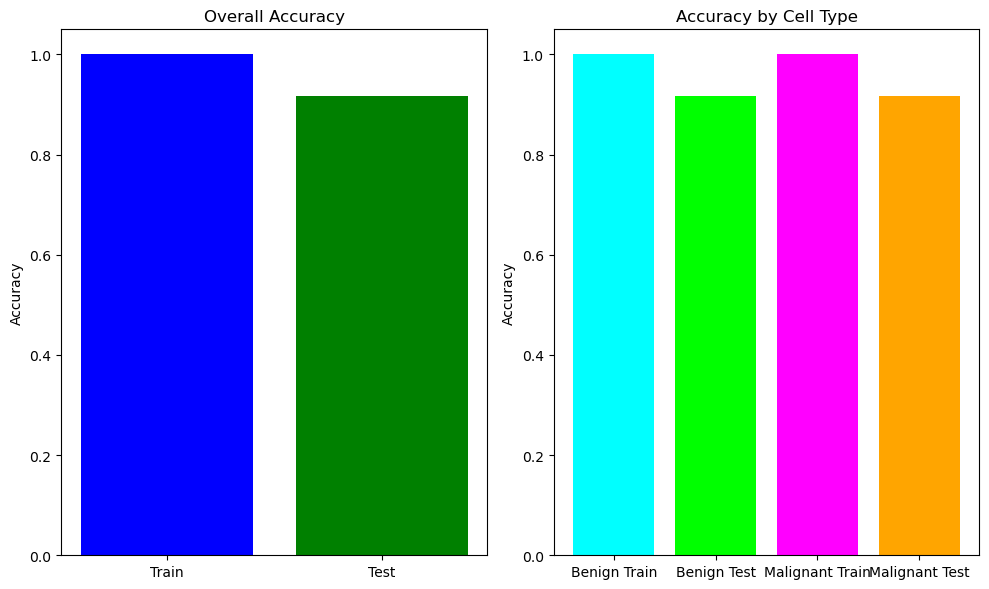

In [13]:
accuracy_plot() 